In this notebook we show how the CancerGrowthModel class is used, using examples and by providing some additional (background) information.

The easiest models to implement, are also the most simplified and less detailed ones. In the case of ODE's these would be the models describing linear and exponential growth.

Linear model prediction: [1, 2.2, 3.4, 4.6]
1.2
1.2
1.2
[0.0, 0.3333333333333333, 0.6666666666666666, 1.0]
[4.6000000000000005, 5.000000000000001, 5.400000000000001, 5.800000000000002]


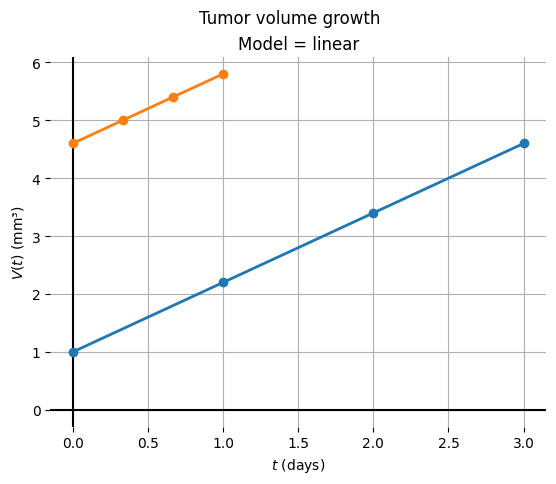

In [1]:
from cancergrowthmodel import CancerGrowthModel as cgm

# Generating prediction according to linear growth
linear_model = cgm(model = "linear",
                   start_size = 1,
                   t_0 = 0,
                   t_end = 3,
                   growth_rate = 1.2)
linear_prediction = linear_model.predict()
print("Linear model prediction:", linear_prediction)

t_s, y_s = linear_model.ode_solver("heun")

linear_model.plot(linear_prediction, t_s=t_s, y_s=y_s)

# Generating prediction according to exponential growth
# exponential_model = cgm(model = "exponential_incr",
#                         start_size = 1,
#                         t_0 = 0,
#                         t_end = 15,
#                         growth_rate = 1.2)
# exponential_incr_prediction = exponential_model.predict()
# print("Exponential incr model prediction:", exponential_incr_prediction)
# exponential_model.plot(exponential_incr_prediction)

[0, 1, 2, 3] [1, 2.2, 3.4, 4.6]


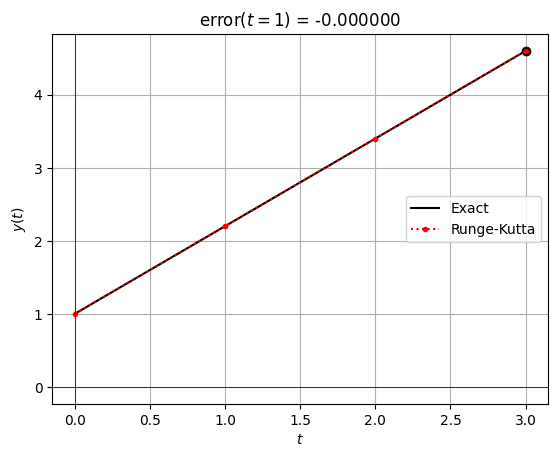

In [1]:
from matplotlib import pyplot as plt
from cancergrowthmodel import CancerGrowthModel as cgm

params = {
    'a':  1.0,
    'b':  1.0,
    'y0': 1.0,
}

linear_model = cgm(model = "linear",
                   start_size = 1,
                   t_0 = 0,
                   t_end = 3,
                   growth_rate = 1.2)

ts_numer, ys_numer = linear_model.compute_curve(1.2)
ys_exact = linear_model.predict()
ts_exact = list(range(0, 3+1))
print(ts_exact, ys_exact)
plt.plot(ts_exact, ys_exact, '-k', label='Exact')
plt.plot(ts_exact[-1], ys_exact[-1], 'ok')
plt.plot(ts_numer, ys_numer, '.:r', label='Runge-Kutta')
plt.axhline(0.0, lw=0.5, color='k'); plt.axvline(0.0, lw=0.5, color='k')
plt.grid(True); plt.legend()
plt.xlabel('$t$'); plt.ylabel('$y(t)$')
plt.title(f'error$(t=1)$ = {ys_exact[-1] - ys_numer[-1]:8.6f}')
plt.show()



While being easy to implement, the linear and exponential models do not keep in account any surrounding variables, such as the maximum tumor size or keep in account that growth should be in relation to volume. So likely they do not give a good representation of real life tumor growth. Luckily there are other models that can be implemented, that do take these extra variables into account, making the predictions more realistic. The exponential flattening model is similar to the exponential model, but uses a maximum tumor size variable, where tumor growth slows down the closer it gets to the maximum size.

exponential_flat [1, 1.96, 2.69, 3.244, 3.666, 3.986, 4.229, 4.414, 4.555, 4.662, 4.743, 4.805, 4.851, 4.887, 4.914, 4.935, 4.95, 4.962, 4.971, 4.978, 4.983]
Exponential flattening model prediction: [1, 1.96, 2.69, 3.244, 3.666, 3.986, 4.229, 4.414, 4.555, 4.662, 4.743, 4.805, 4.851, 4.887, 4.914, 4.935, 4.95, 4.962, 4.971, 4.978, 4.983]


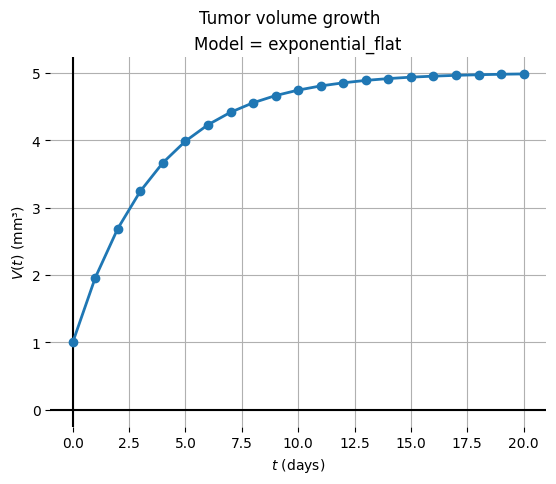

In [2]:
# Generating prediction according to exponential flattening growth
exponential_flattening_model = cgm(model = "exponential_flat",
                                   start_size = 1,
                                   t_0 = 0,
                                   t_end = 20,
                                   growth_rate = 1.2,
                                   step_size = 1,
                                   max_size = 5)
exponential_flattening_prediction = exponential_flattening_model.predict()
print("Exponential flattening model prediction:", exponential_flattening_prediction)
exponential_flattening_model.plot(exponential_flattening_prediction)


logistic [1, 2.17, 4.633, 9.548, 18.271, 30.181, 39.072, 40.16, 39.967, 40.007, 39.999, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0]
Logistic model prediction: [1, 2.17, 4.633, 9.548, 18.271, 30.181, 39.072, 40.16, 39.967, 40.007, 39.999, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0]


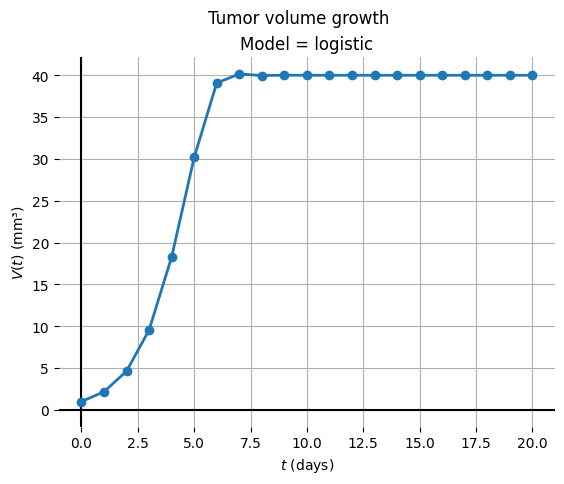

In [3]:
# Generating prediction according to logistic growth
logistic_model = cgm(model = "logistic",
                     start_size = 1,
                     t_0 = 0,
                     t_end = 20,
                     growth_rate = 1.2,
                     step_size = 1,
                     max_size = 40)
logistic_model_prediction = logistic_model.predict()
print("Logistic model prediction:", logistic_model_prediction)
logistic_model.plot(logistic_model_prediction)


allee [10, 14.5, 21.767, 30.939, 37.99, 39.979, 40.001, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0]
Allee model prediction: [10, 14.5, 21.767, 30.939, 37.99, 39.979, 40.001, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0]


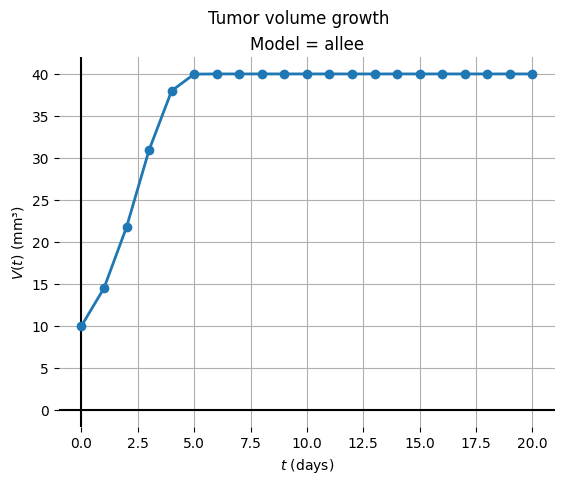

In [4]:
# Generating prediction according to allee growth
allee_model = cgm(model = "allee",
                  start_size = 10,
                  t_0 = 0,
                  t_end = 20,
                  growth_rate = 1.2,
                  step_size = 1,
                  max_size = 40,
                  min_size = 5)
allee_prediction = allee_model.predict()
print("Allee model prediction:", allee_prediction)
allee_model.plot(allee_prediction)


mendelsohn [1, 1.5, 2.419, 4.299, 8.756, 21.712]
Mendelsohn model prediction: [1, 1.5, 2.419, 4.299, 8.756, 21.712]


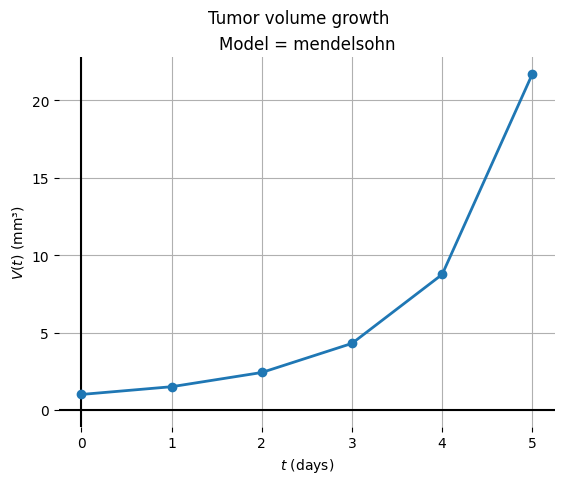

In [10]:
# Generating prediction according to Mendelsohn growth
# Still have to fix this
mendelsohn_model = cgm(model = "mendelsohn",
                       start_size = 1,
                       t_0 = 0,
                       t_end = 5,
                       growth_rate = 0.5,
                       step_size = 1,
                       a = 1.5)
mendelsohn_prediction = mendelsohn_model.predict()
print("Mendelsohn model prediction:", mendelsohn_prediction)
mendelsohn_model.plot(mendelsohn_prediction)

Montroll model prediction: [1, 1.484, 2.184, 3.164, 4.465, 6.031, 7.634, 8.905, 9.616, 9.89, 9.971]


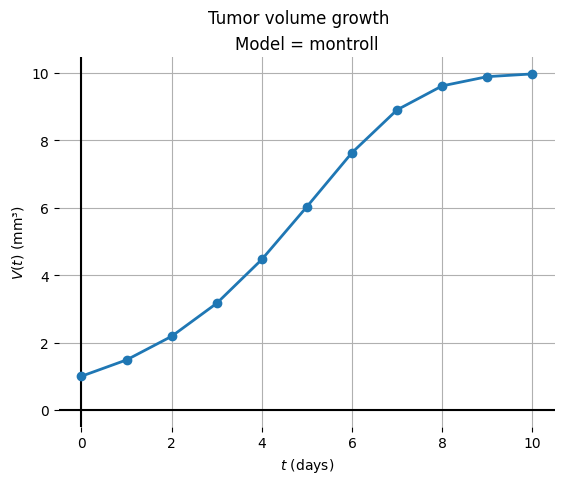

In [2]:
# Generating prediction according to Montroll growth
montroll_model = cgm(model = "montroll",
                       start_size = 1,
                       t_0 = 0,
                       t_end = 10,
                       growth_rate = 0.5,
                       step_size = 1,
                       a = 1.5,
                       max_size = 10)
montroll_prediction = montroll_model.predict()
print("Montroll model prediction:", montroll_prediction)
montroll_model.plot(montroll_prediction)

linear_limited [1, 1.2, 1.422, 1.666, 1.929, 2.21, 2.508, 2.821, 3.147, 3.486, 3.835, 4.195, 4.563, 4.939, 5.323, 5.713, 6.109, 6.51, 6.917, 7.328, 7.743, 8.161, 8.584, 9.009, 9.438, 9.869, 10.303, 10.74, 11.179, 11.62, 12.062]
Linear limited model prediction: [1, 1.2, 1.422, 1.666, 1.929, 2.21, 2.508, 2.821, 3.147, 3.486, 3.835, 4.195, 4.563, 4.939, 5.323, 5.713, 6.109, 6.51, 6.917, 7.328, 7.743, 8.161, 8.584, 9.009, 9.438, 9.869, 10.303, 10.74, 11.179, 11.62, 12.062]


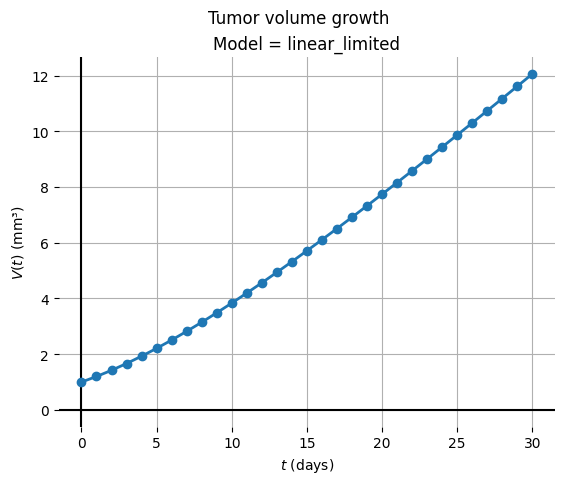

In [22]:
# Generating prediction according to linear limited growth
linear_limited_model = cgm(model = "linear_limited",
                       start_size = 1,
                       t_0 = 0,
                       t_end = 30,
                       growth_rate = 0.5,
                       step_size = 1,
                       a = 1.5)
linear_limited_prediction = linear_limited_model.predict()
print("Linear limited model prediction:", linear_limited_prediction)
linear_limited_model.plot(linear_limited_prediction)

Surface limited model prediction: [1, 2.0, 3.2, 4.497, 5.847, 7.229, 8.632, 10.05, 11.479, 12.916, 14.36, 15.81, 17.264, 18.722, 20.183, 21.646, 23.112, 24.581, 26.051, 27.523, 28.996, 30.47, 31.946, 33.423, 34.901, 36.38, 37.859, 39.34, 40.821, 42.303, 43.785, 45.268, 46.752, 48.236, 49.721, 51.206, 52.691, 54.177, 55.664, 57.15, 58.637, 60.124, 61.612, 63.1, 64.588, 66.077, 67.565, 69.054, 70.544, 72.033, 73.523]


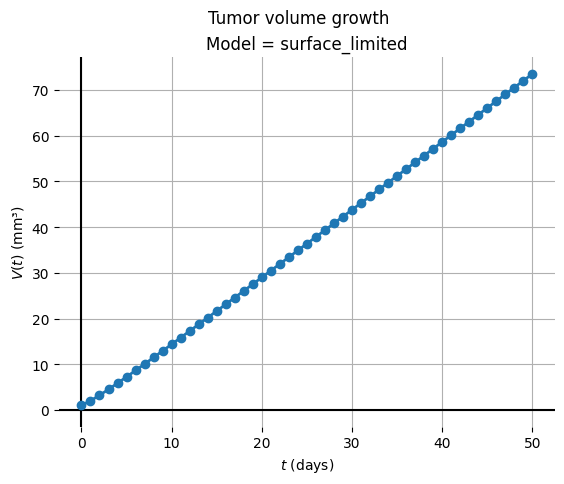

In [6]:
# Generating prediction according to surface limited growth
surface_limited_model = cgm(model = "surface_limited",
                       start_size = 1,
                       t_0 = 0,
                       t_end = 50,
                       growth_rate = 0.5,
                       step_size = 1,
                       a = 0.5)
surface_limited_prediction = surface_limited_model.predict()
print("Surface limited model prediction:", surface_limited_prediction)
surface_limited_model.plot(surface_limited_prediction)

Bertalanffy model prediction: [1, -0.75, 1.875, 1.613, 1.023, -0.663, 2.396, 2.655, 3.136, 3.986, 5.414, 7.706, 11.267, 16.7, 24.916, 37.283, 55.864, 83.756, 125.607, 188.393, 282.577, 423.858, 635.782, 953.669, 1430.501, 2145.75, 3218.623, 4827.934, 7241.901, 10862.852, 16294.277]


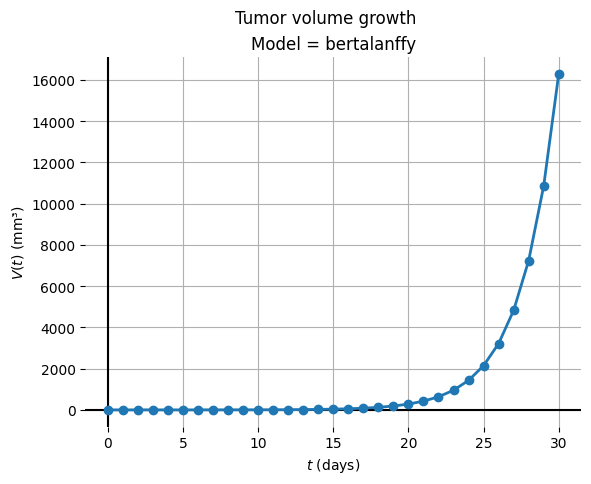

In [3]:
# Generating prediction according to Bertalanffy growth
bertalanffy_model = cgm(model = "bertalanffy",
                       start_size = 1,
                       t_0 = 0,
                       t_end = 30,
                       growth_rate = 0.5,
                       step_size = 1,
                       a = 1.5)
bertalanffy_prediction = bertalanffy_model.predict()
print("Bertalanffy model prediction:", bertalanffy_prediction)
bertalanffy_model.plot(bertalanffy_prediction)

Bertalanffy model prediction: [1, 2.956, 7.136, 14.083, 23.004, 31.934, 39.093, 43.903, 46.758, 48.325, 49.148, 49.571, 49.784, 49.892, 49.946, 49.973, 49.986, 49.993, 49.997, 49.998, 49.999, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0]


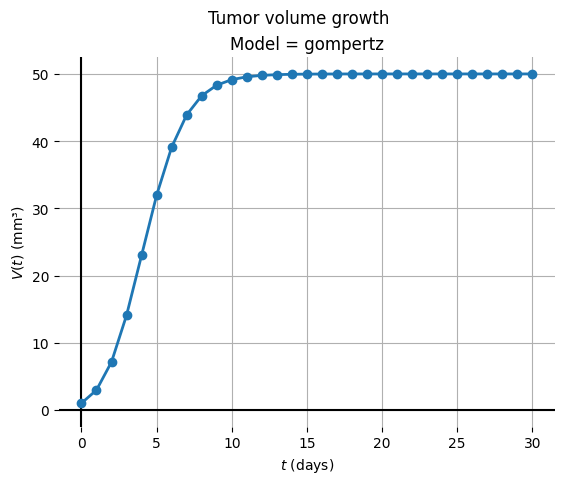

In [8]:
# Generating prediction according to Gompertz growth
gompertz_model = cgm(model = "gompertz",
                       start_size = 1,
                       t_0 = 0,
                       t_end = 30,
                       growth_rate = 0.5,
                       step_size = 1,
                       max_size = 50)
gompertz_prediction = gompertz_model.predict()
print("Bertalanffy model prediction:", gompertz_prediction)
gompertz_model.plot(gompertz_prediction)